<a href="https://colab.research.google.com/github/FaridSoroush/Hand_Gesture_Recognition_for_AR_VR_Interfaces/blob/main/Hand_Gesture_Recognition_for_AR_VR_Interfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install packages:**

In [ ]:
!pip install tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

**Load dataset, preprocess images, create train and test sets:**

In [ ]:
# Load the rock_paper_scissors dataset
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True)

# Function to preprocess the images
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

# Preprocess the training and test datasets
ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

**Train the model:**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

num_classes = 3  # rock, paper, scissors

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10
)


Epoch 1/10
79/79 [==============================] - 43s 528ms/step - loss: 0.6568 - accuracy: 0.7278 - val_loss: 0.5864 - val_accuracy: 0.7796
Epoch 2/10
79/79 [==============================] - 40s 506ms/step - loss: 0.0222 - accuracy: 0.9956 - val_loss: 0.7781 - val_accuracy: 0.8091
Epoch 3/10
79/79 [==============================] - 36s 460ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.9920 - val_accuracy: 0.7823
Epoch 4/10
79/79 [==============================] - 38s 477ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0990 - val_accuracy: 0.7715
Epoch 5/10
79/79 [==============================] - 40s 508ms/step - loss: 5.0150e-04 - accuracy: 1.0000 - val_loss: 1.2603 - val_accuracy: 0.7769
Epoch 6/10
79/79 [==============================] - 39s 497ms/step - loss: 2.4464e-04 - accuracy: 1.0000 - val_loss: 1.3761 - val_accuracy: 0.7796
Epoch 7/10
79/79 [==============================] - 38s 478ms/step - loss: 1.5031e-04 - accuracy: 1.0000 - val_loss: 1.4501 - val_accu

**Save the Trained Model:**

In [ ]:
model.save('model.h5')

**For real time video capture:**

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0) # Open the default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame (resize, normalize, etc.)
    # ...

    # Predict the gesture
    prediction = model.predict(preprocessed_frame)

    # Display the resulting frame
    cv2.imshow('Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

**For single image:**

In [11]:
import cv2
import numpy as np
import tensorflow as tf

def load_and_preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the size expected by your model
    img = cv2.resize(img, (128, 128))

    # Normalize the image
    img = img / 255.0

    # Add batch dimension
    img = np.expand_dims(img, axis=0)
    return img

image_path = 'image.png'
img = load_and_preprocess_image(image_path)


In [14]:
# Load your trained model
model = tf.keras.models.load_model('model.h5')

# Make a prediction
prediction = model.predict(img)

# Decode the prediction
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 153ms/step
Predicted class: [2]


**Class 2 is scissor:**

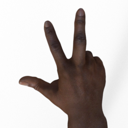